<h3>Перекрестная проверка</h3>

In [10]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [11]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели SVM
svm_model = SVC()

# Перекрестная проверка для оценки модели
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Вывод результатов перекрестной проверки
print("Результаты перекрестной проверки:")
print(cross_val_scores)

Результаты перекрестной проверки:
[0.98958333 0.98263889 0.97560976 0.99303136 0.98954704]


In [14]:
print("Средняя правильность перекрестной проверки:")
print(cross_val_scores.mean())

Средняя правильность перекрестной проверки:
0.9860820751064654


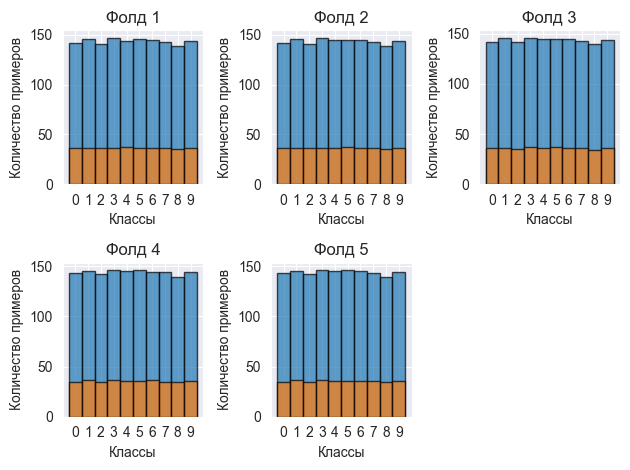

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold

#Стратифицированная k-блочная перекрестная проверка 

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Визуализация распределения классов в каждом фолде
for i, (train_idx, test_idx) in enumerate(stratified_kfold.split(X, y)):
    plt.subplot(2, 3, i + 1)
    plt.hist(y[train_idx], bins=np.arange(11) - 0.5, edgecolor='black', alpha=0.7)
    plt.hist(y[test_idx], bins=np.arange(11) - 0.5, edgecolor='black', alpha=0.7)
    plt.title(f'Фолд {i + 1}')
    plt.xticks(range(10))
    plt.xlabel('Классы')
    plt.ylabel('Количество примеров')

plt.tight_layout()
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold, LeaveOneOut, GroupKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Перекрестная проверка с исключением по одному (Leave-One-Out)
loo = LeaveOneOut()
loo_cross_val_scores = cross_val_score(svm_model, X, y, cv=loo)
print("\nПерекрестная проверка с исключением по одному:")
print(loo_cross_val_scores)
print("Средняя точность:", np.mean(loo_cross_val_scores))


Перекрестная проверка с исключением по одному:
[1. 1. 1. ... 1. 1. 1.]
Средняя точность: 0.988313856427379


In [25]:
# Перекрестная проверка с использованием групп
groups = np.array([i // 2 for i in range(len(X))])  # Просто пример групп
group_kfold = GroupKFold(n_splits=5)
group_cross_val_scores = cross_val_score(svm_model, X, y, groups=groups, cv=group_kfold)
print("\nПерекрестная проверка с использованием групп:")
print(group_cross_val_scores)
print("Средняя точность:", np.mean(group_cross_val_scores))


Перекрестная проверка с использованием групп:
[0.98888889 0.98611111 0.98888889 0.98328691 0.98324022]
Средняя точность: 0.986083204086114


In [26]:
# Перекрестная проверка с получением предсказаний для построения матрицы ошибок
y_pred = cross_val_predict(svm_model, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred)
print("\nМатрица ошибок:")
print(conf_matrix)


Матрица ошибок:
[[177   0   0   0   1   0   0   0   0   0]
 [  0 180   0   0   0   0   1   0   1   0]
 [  0   1 174   0   0   0   0   0   2   0]
 [  0   0   1 167   0   2   0   3   9   1]
 [  0   1   0   0 177   0   0   0   1   2]
 [  0   0   0   0   0 178   1   0   0   3]
 [  0   0   0   0   0   1 179   0   1   0]
 [  0   0   0   0   0   0   0 167   1  11]
 [  0   8   0   0   0   1   0   0 163   2]
 [  0   0   0   2   0   2   0   5   2 169]]


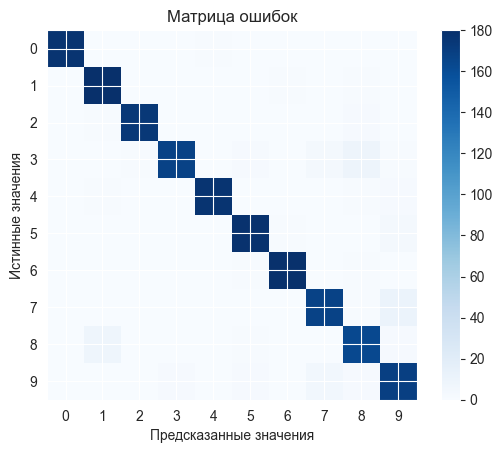

In [27]:
# Визуализация матрицы ошибок
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.colorbar()
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

<h3>Решетчатый поиск</h3>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Загрузка датасета digits
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели SVM
svm_model = SVC()

# Простой решетчатый поиск
simple_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly']
}

simple_grid_search = GridSearchCV(svm_model, simple_grid, cv=5)
simple_grid_search.fit(X_train, y_train)
print("Простой решетчатый поиск:")
print("Лучшие параметры:", simple_grid_search.best_params_)
print("Точность на тестовой выборке:", accuracy_score(y_test, simple_grid_search.predict(X_test)))
print()

Простой решетчатый поиск:
Лучшие параметры: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Точность на тестовой выборке: 0.9888888888888889


In [22]:
# Решетчатый поиск с перекрестной проверкой
full_grid = {
    'C': np.logspace(-3, 3, 7),
    'gamma': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly']
}

full_grid_search = GridSearchCV(svm_model, full_grid, cv=5)
full_grid_search.fit(X_train, y_train)
print("Решетчатый поиск с перекрестной проверкой:")
print("Лучшие параметры:", full_grid_search.best_params_)
print("Точность на тестовой выборке:", accuracy_score(y_test, full_grid_search.predict(X_test)))
print()

Решетчатый поиск с перекрестной проверкой:
Лучшие параметры: {'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}
Точность на тестовой выборке: 0.9888888888888889


In [29]:
# Экономичный решетчатый поиск (RandomizedSearchCV)
randomized_grid = {
    'C': np.logspace(-3, 3, 7),
    'gamma': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly']
}

randomized_grid_search = RandomizedSearchCV(svm_model, randomized_grid, n_iter=10, cv=5)
randomized_grid_search.fit(X_train, y_train)
print("Экономичный решетчатый поиск:")
print("Лучшие параметры:", randomized_grid_search.best_params_)
print("Точность на тестовой выборке:", accuracy_score(y_test, randomized_grid_search.predict(X_test)))
print()

Экономичный решетчатый поиск:
Лучшие параметры: {'kernel': 'rbf', 'gamma': 0.001, 'C': 100.0}
Точность на тестовой выборке: 0.9888888888888889


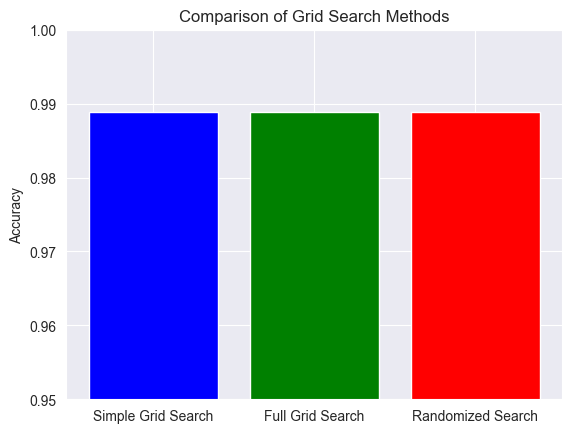

Лучшие параметры (Simple Grid Search): {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Лучшие параметры (Full Grid Search): {'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}
Лучшие параметры (Randomized Search): {'kernel': 'rbf', 'gamma': 0.001, 'C': 100.0}


In [30]:
# Оценка моделей
simple_accuracy = accuracy_score(y_test, simple_grid_search.predict(X_test))
full_accuracy = accuracy_score(y_test, full_grid_search.predict(X_test))
randomized_accuracy = accuracy_score(y_test, randomized_grid_search.predict(X_test))

# Визуализация результатов
labels = ['Simple Grid Search', 'Full Grid Search', 'Randomized Search']
accuracies = [simple_accuracy, full_accuracy, randomized_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0.95, 1.0)
plt.ylabel('Accuracy')
plt.title('Comparison of Grid Search Methods')
plt.show()

# Вывод лучших параметров для каждого метода
print("Лучшие параметры (Simple Grid Search):", simple_grid_search.best_params_)
print("Лучшие параметры (Full Grid Search):", full_grid_search.best_params_)
print("Лучшие параметры (Randomized Search):", randomized_grid_search.best_params_)

<h3>Метрики качества моделей и их вычисление</h3>

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import classification_report, precision_recall_curve

# Обучение модели
svm_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = svm_model.predict(X_test)

# Метрики бинарной классификации
binary_accuracy = accuracy_score(y_test, y_pred)
binary_precision = precision_score(y_test, y_pred, average='weighted')
binary_recall = recall_score(y_test, y_pred, average='weighted')
binary_f1 = f1_score(y_test, y_pred, average='weighted')

print("Метрики бинарной классификации:")
print("Accuracy:", binary_accuracy)
print("Precision:", binary_precision)
print("Recall:", binary_recall)
print("F1 Score:", binary_f1)

Метрики бинарной классификации:
Accuracy: 0.9861111111111112
Precision: 0.9861882716049383
Recall: 0.9861111111111112
F1 Score: 0.9861071324368055


In [33]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок:")
print(conf_matrix)


Матрица ошибок:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


In [38]:
# Классификационный отчет
print("\nКлассификационный отчет:")
print(classification_report(y_test, y_pred))


Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360
